In [3]:
import numpy as np
import pandas as pd
data=pd.read_csv('final_dataset.csv')
y=data['click']
x=data[['ad_position_type','cms_group_id','gender','age_level','shopping_level','occupation','new_user_class_level','price','btag','cate']]

In [4]:
# separate the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [16]:
! pip install keras 
! pip install Tensorflow

In [1]:
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras import optimizers
from keras.models import Sequential
import tensorflow as tf

In [5]:
# Start building a simple neural network
n_cols = x_train.shape[1]
model_1 = Sequential()
model_1.add(Dense(10, activation = 'relu', input_shape = (n_cols,)))
model_1.add(Dense(10, activation = 'relu')) #Have tried different units and found 10 having the best performance.
model_1.add(Dense(1))
model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [105]:
model_1.fit(x_train,y_train,epochs=5,validation_data = (x_test,y_test))

Epoch 1/5
1407/1407 [==============================] - 7s 5ms/step - loss: 6.5857e-09 - accuracy: 0.9245 - val_loss: 7.0175e-09 - val_accuracy: 0.9186
Epoch 2/5
1407/1407 [==============================] - 6s 5ms/step - loss: 6.5857e-09 - accuracy: 0.9245 - val_loss: 7.0175e-09 - val_accuracy: 0.9186
Epoch 3/5
1407/1407 [==============================] - 7s 5ms/step - loss: 6.5857e-09 - accuracy: 0.9245 - val_loss: 7.0175e-09 - val_accuracy: 0.9186
Epoch 4/5
1407/1407 [==============================] - 6s 5ms/step - loss: 6.5857e-09 - accuracy: 0.9245 - val_loss: 7.0175e-09 - val_accuracy: 0.9186
Epoch 5/5
1407/1407 [==============================] - 7s 5ms/step - loss: 6.5857e-09 - accuracy: 0.9245 - val_loss: 7.0175e-09 - val_accuracy: 0.9186


In [6]:
#A function to build different neural network with other slightly different architectures.
def build_neural_network_model(neuron=10,n_hidden_layers=1,lr=0.01):
    model = Sequential()
    model.add(Dense(neuron,activation = 'relu', input_shape = (n_cols,)))
    for _ in range(n_hidden_layers):
        model.add(Dense(neuron,activation = 'relu'))
    model.add(Dense(1))
    optimizer = optimizers.SGD(lr)
    model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True), optimizer = optimizer, metrics = ['accuracy'])
    return model

In [108]:
model_2 = build_neural_network_model()
model_2.fit(x_train,y_train,epochs=10,validation_data = (x_test,y_test))

Epoch 1/10
1407/1407 [==============================] - 7s 5ms/step - loss: 5387.3637 - accuracy: 0.9351 - val_loss: 0.2379 - val_accuracy: 0.9411
Epoch 2/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2229 - accuracy: 0.9454 - val_loss: 0.2253 - val_accuracy: 0.9411
Epoch 3/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2178 - accuracy: 0.9438 - val_loss: 0.2239 - val_accuracy: 0.9411
Epoch 4/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2122 - accuracy: 0.9454 - val_loss: 0.2238 - val_accuracy: 0.9411
Epoch 5/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2152 - accuracy: 0.9442 - val_loss: 0.2239 - val_accuracy: 0.9411
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2100 - accuracy: 0.9461 - val_loss: 0.2239 - val_accuracy: 0.9411
Epoch 7/10
1407/1407 [==============================] - 6s 5ms/step - loss: 0.2066 - accuracy: 0.9473 - val_loss: 0.2239 - val_accura

In [7]:
#Try to increase model capacity by adding one more hidden layer
model_3 = build_neural_network_model(n_hidden_layers=5,neuron = 15)
model_3.fit(x_train,y_train,epochs=10,validation_data = (x_test,y_test))

Epoch 1/10
1407/1407 [==============================] - 21s 6ms/step - loss: 23184080572287.9375 - accuracy: 0.9336 - val_loss: 0.2375 - val_accuracy: 0.9411
Epoch 2/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2239 - accuracy: 0.9449 - val_loss: 0.2252 - val_accuracy: 0.9411
Epoch 3/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2140 - accuracy: 0.9452 - val_loss: 0.2239 - val_accuracy: 0.9411
Epoch 4/10
1407/1407 [==============================] - 9s 6ms/step - loss: 0.2151 - accuracy: 0.9443 - val_loss: 0.2238 - val_accuracy: 0.9411
Epoch 5/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2149 - accuracy: 0.9443 - val_loss: 0.2239 - val_accuracy: 0.9411
Epoch 6/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2162 - accuracy: 0.9439 - val_loss: 0.2239 - val_accuracy: 0.9411
Epoch 7/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2147 - accuracy: 0.9444 - val_loss: 0.2239 -

In [101]:
model_3.evaluate(x_test,y_test)

469/469 [==============================] - 1s 3ms/step - loss: 0.2253 - accuracy: 0.9411


[0.22527170181274414, 0.9411333203315735]

In [16]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 15)                165       
_________________________________________________________________
dense_4 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_5 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_6 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_7 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_8 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [106]:
#Try different learning rate
model_4 = build_neural_network_model(lr=0.0001)
model_4.fit(x_train,y_train,epochs=10,validation_data = (x_test,y_test))

Epoch 1/10
1407/1407 [==============================] - 7s 4ms/step - loss: 9.6788 - accuracy: 0.9253 - val_loss: 0.3067 - val_accuracy: 0.9399
Epoch 2/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2713 - accuracy: 0.9438 - val_loss: 0.7551 - val_accuracy: 0.9287
Epoch 3/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2596 - accuracy: 0.9442 - val_loss: 0.2691 - val_accuracy: 0.9411
Epoch 4/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2495 - accuracy: 0.9454 - val_loss: 0.2705 - val_accuracy: 0.9411
Epoch 5/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2553 - accuracy: 0.9447 - val_loss: 0.2664 - val_accuracy: 0.9411
Epoch 6/10
1407/1407 [==============================] - 8s 5ms/step - loss: 0.2507 - accuracy: 0.9453 - val_loss: 0.2663 - val_accuracy: 0.9411
Epoch 7/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2493 - accuracy: 0.9454 - val_loss: 0.2665 - val_accuracy:

In [107]:
#Try different learning rate
model_5 = build_neural_network_model(lr=1)
model_5.fit(x_train,y_train,epochs=10,validation_data = (x_test,y_test))

Epoch 1/10
1407/1407 [==============================] - 7s 4ms/step - loss: 265468821.5798 - accuracy: 0.9401 - val_loss: 0.2248 - val_accuracy: 0.9411
Epoch 2/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2112 - accuracy: 0.9458 - val_loss: 0.2244 - val_accuracy: 0.9411
Epoch 3/10
1407/1407 [==============================] - 6s 5ms/step - loss: 0.2157 - accuracy: 0.9442 - val_loss: 0.2258 - val_accuracy: 0.9411
Epoch 4/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2092 - accuracy: 0.9465 - val_loss: 0.2254 - val_accuracy: 0.9411
Epoch 5/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2125 - accuracy: 0.9454 - val_loss: 0.2248 - val_accuracy: 0.9411
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2165 - accuracy: 0.9438 - val_loss: 0.2250 - val_accuracy: 0.9411
Epoch 7/10
1407/1407 [==============================] - 6s 5ms/step - loss: 0.2090 - accuracy: 0.9465 - val_loss: 0.2241 - val_a

In [114]:
#It seems that the validation accuracy can not get improved and kept in the 0.9411 level, so we choose the model with smallest validation loss value which is model_3
#Now we try to visualize the result of our best model, model_3
model_3 = build_neural_network_model(n_hidden_layers=5,neuron = 15)
history = model_3.fit(x_train,y_train,epochs=20,validation_data = (x_test,y_test))

Epoch 1/20
1407/1407 [==============================] - 9s 6ms/step - loss: 183554842.9631 - accuracy: 0.9327 - val_loss: 0.2380 - val_accuracy: 0.9411
Epoch 2/20
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2283 - accuracy: 0.9431 - val_loss: 0.2252 - val_accuracy: 0.9411
Epoch 3/20
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2177 - accuracy: 0.9438 - val_loss: 0.2239 - val_accuracy: 0.9411
Epoch 4/20
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2174 - accuracy: 0.9435 - val_loss: 0.2238 - val_accuracy: 0.9411
Epoch 5/20
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2139 - accuracy: 0.9447 - val_loss: 0.2239 - val_accuracy: 0.9411
Epoch 6/20
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2118 - accuracy: 0.9454 - val_loss: 0.2239 - val_accuracy: 0.9411
Epoch 7/20
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2132 - accuracy: 0.9449 - val_loss: 0.2239 - val_a

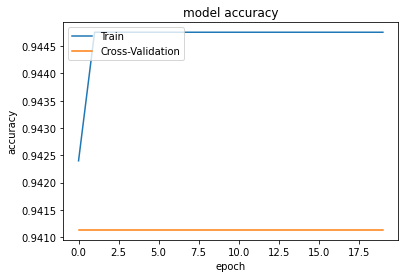

In [115]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Cross-Validation'],loc='upper left')
plt.show()

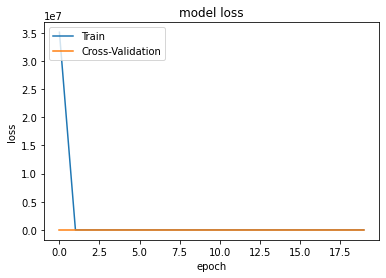

In [116]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Cross-Validation'],loc='upper left')
plt.show()

In [17]:
# Try other neural networks

In [18]:
import pprint

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

import tensorflow_recommenders as tfrs

In [19]:
num_train = 90000
train_x = x[:num_train]
train_y = y[:num_train]
eval_x = x[num_train:]
eval_y = y[num_train:]

In [20]:
class Model(tfrs.Model):

  def __init__(self, model):
    super().__init__()
    self._model = model
    self._logit_layer = tf.keras.layers.Dense(1)

    self.task = tfrs.tasks.Ranking(
      loss=tf.keras.losses.MeanSquaredError(),
      metrics=[
        tf.keras.metrics.RootMeanSquaredError("RMSE")
      ]
    )

  def call(self, x):
    x = self._model(x)
    return self._logit_layer(x)

  def compute_loss(self, features, training=False):
    x, labels = features
    scores = self(x)

    return self.task(
        labels=labels,
        predictions=scores,
    )

In [21]:
crossnet = Model(tfrs.layers.dcn.Cross())
deepnet = Model(
    tf.keras.Sequential([
      tf.keras.layers.Dense(512, activation="relu"),
      tf.keras.layers.Dense(256, activation="relu"),
      tf.keras.layers.Dense(128, activation="relu")
    ])
)

In [22]:
train_data = tf.data.Dataset.from_tensor_slices((train_x, train_y)).batch(1000)
eval_data = tf.data.Dataset.from_tensor_slices((eval_x, eval_y)).batch(1000)

In [23]:
epochs = 100
learning_rate = 0.4

In [24]:
crossnet.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate))
crossnet.fit(train_data, epochs=epochs, verbose=False)

In [25]:
crossnet_result = crossnet.evaluate(eval_data, return_dict=True, verbose=False)

In [26]:
deepnet.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate))
deepnet.fit(train_data, epochs=epochs, verbose=False)

In [27]:
deepnet_result = deepnet.evaluate(eval_data, return_dict=True, verbose=False)

<ipython-input-28-8436e642fbfc>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels([''] + features, rotation=45, fontsize=10)
<ipython-input-28-8436e642fbfc>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_yticklabels([''] + features, fontsize=10)


<Figure size 648x648 with 0 Axes>

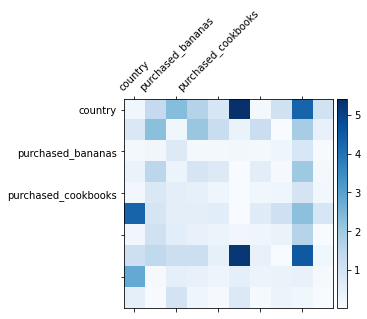

In [28]:
mat = crossnet._model._dense.kernel
features = ["country", "purchased_bananas", "purchased_cookbooks"]

plt.figure(figsize=(9,9))
im = plt.matshow(np.abs(mat.numpy()), cmap=plt.cm.Blues)
ax = plt.gca()
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
cax.tick_params(labelsize=10) 
_ = ax.set_xticklabels([''] + features, rotation=45, fontsize=10)
_ = ax.set_yticklabels([''] + features, fontsize=10)